In [1]:
import pandas as pd

DATA = '/kaggle/input/bitcoin/btc_data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, header=[0, 2], parse_dates=[('Price', 'Date')])
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df['year'] = df['Date'].dt.year
df['dollars'] = 0.5 * (df['High'] + df['Low']) * df['Volume']
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,2014,9.692403e+09
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,2014,1.499957e+10
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,2014,1.540236e+10
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,2014,1.498835e+10
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,2014,1.070656e+10


First let's take a look at the price correlations to see if there are any columns that contain no information that is unique to them.

In [2]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open']].corr()

,Adj Close,Close,High,Low,Open
Adj Close,1.000000,1.000000,0.999601,0.999484,0.999026
Close,1.000000,1.000000,0.999601,0.999484,0.999026
High,0.999601,0.999601,1.000000,0.999179,0.999548
Low,0.999484,0.999484,0.999179,1.000000,0.999322
Open,0.999026,0.999026,0.999548,0.999322,1.000000


Because BTC has no dividends or splits the adjusted closing prices and the closing prices are always the same.

<Axes: xlabel='Date', ylabel='Close'>

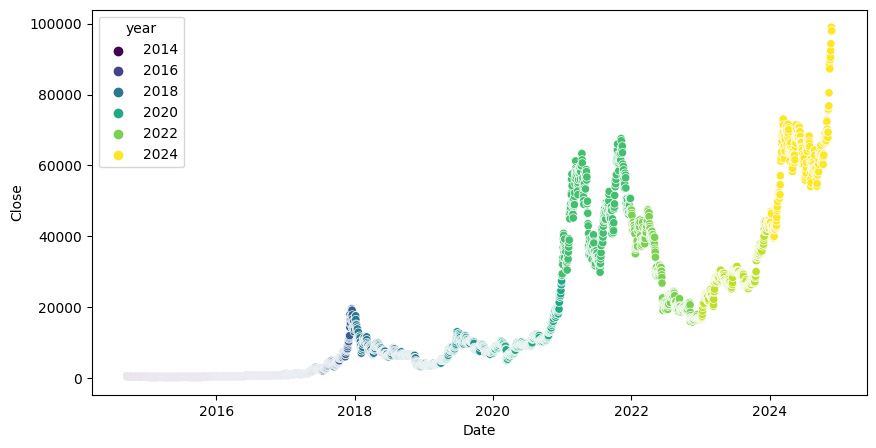

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

BTC seems to have long periods of stable prices followed by short periods of high volatility. Let's look at the prices in a log plot.

<Axes: xlabel='Date', ylabel='Close'>

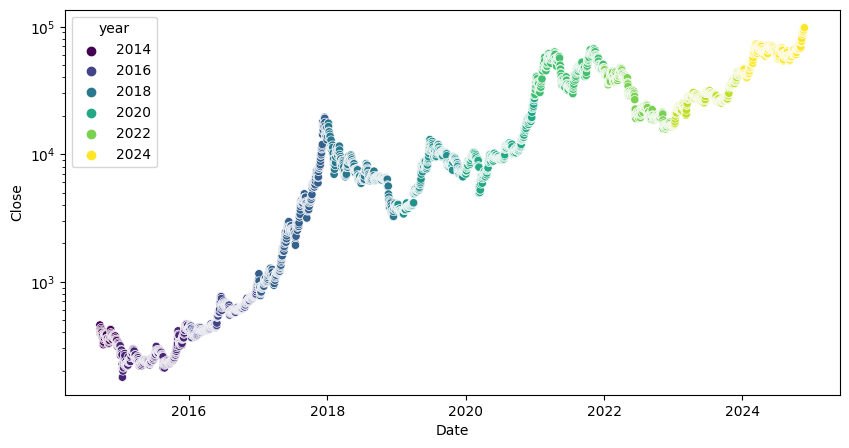

In [4]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

Not surprisingly the flat early period is also hiding some volatility we can only see in a log plot.

Let's look at the daily volatility by plotting high and low prices. We expect daily volatility to look like a whisper on this time scale.

<Axes: xlabel='Low', ylabel='High'>

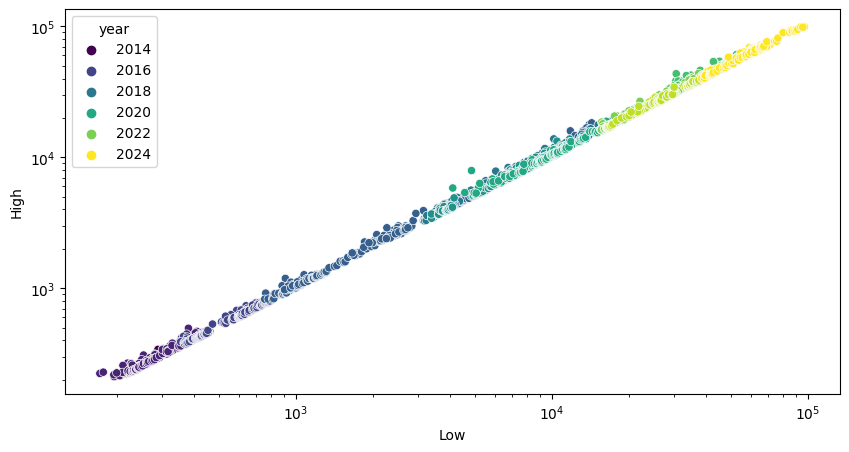

In [5]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Low', y='High', hue='year', palette='viridis')

How about price and volume. Do we expect to see price as a function of volume? Or the other way around?

<Axes: xlabel='Close', ylabel='Volume'>

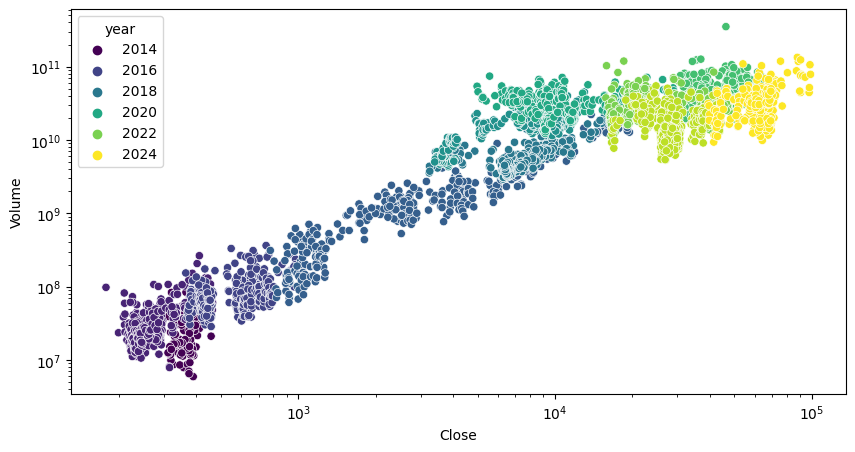

In [6]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis')

It certainly looks like volume is a function of price that slopes upward even on a log-log plot.

<Axes: xlabel='Volume', ylabel='Close'>

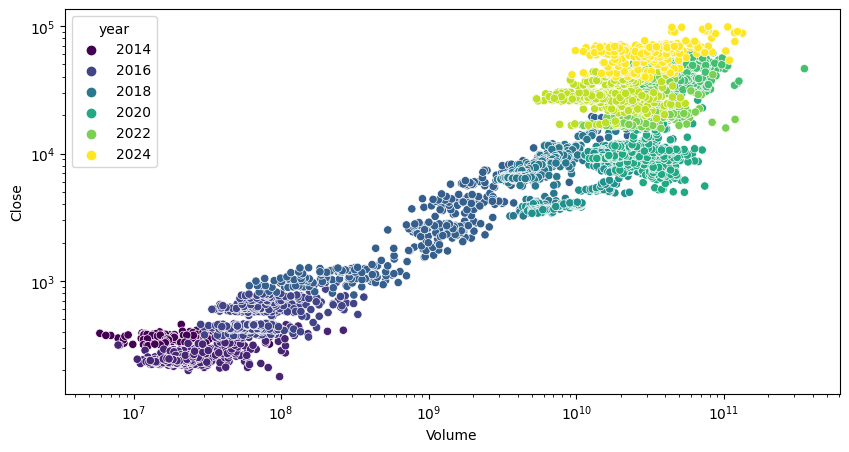

In [7]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, y='Close', x='Volume', hue='year', palette='viridis')

Similarly price looks like a function of volume, sort of.

In [8]:
df[['Close', 'Volume']].corr()

,Close,Volume
Close,1.000000,0.652266
Volume,0.652266,1.000000


They're somewhat positively correlated overall.

Let's look at the dollars traded each day, as approximated by multiplying the mid price by the volume, to see how that behaves over time.

<Axes: xlabel='Date', ylabel='dollars'>

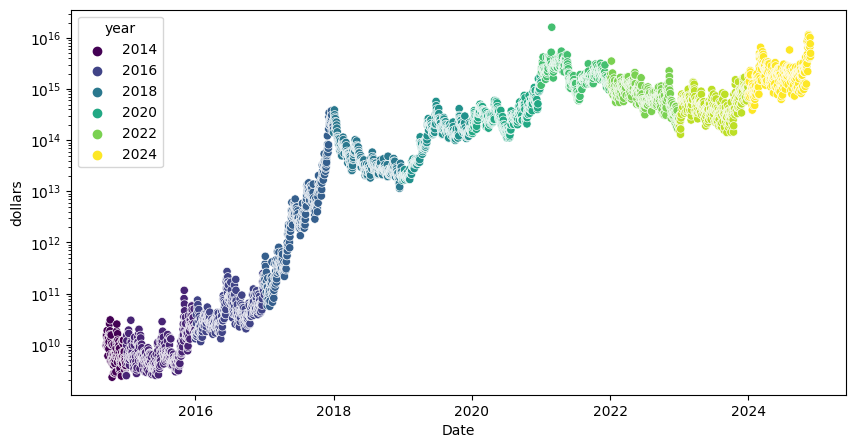

In [9]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis')

We rarely see total dollars traded trend up like that over time; usually, price increases depress dollar volume over time.

<Axes: xlabel='year', ylabel='Close'>

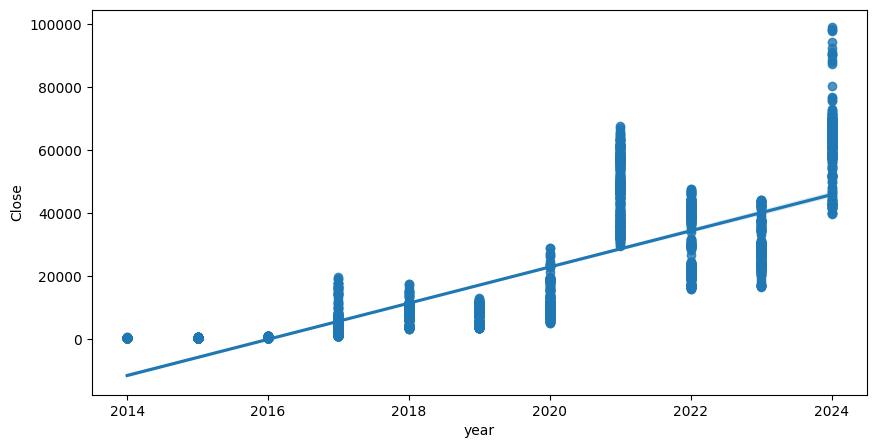

In [10]:
from seaborn import regplot

plt.figure(figsize=(10, 5))
regplot(data=df, x='year', y='Close', )